In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats

### Negative Binomial Distribution

Binomial: P of k successes in n independent trials, with probability of p in each trial.

Negative Binomial: P of n independent trials leading to k successes, with probability of p in each trial.

Binomial: P of finding 3 GC pairs in 5 base pairs, p=0.4 for each trial.

Negative Binomial: P of making 5 trials to find 3 GC pairs, p=0.4 for each trial. P of finding 3 GC pairs on the 5th trial.

Formally: Probability of k-1 successes and (n-k) failures in n-1 trials, and successes on the nth trial.

(P of Binomial in n-1 trials for k-1 successes)*(P of success in the last trial)

|||RNASeq Analysis|||

In [3]:
def NegBinom(n, k, p):
    return math.comb(n-1, k-1)*(p**(k-1))*((1-p)**(n-k))*p

In [4]:
NegBinom(5, 3, 0.4)

0.13824000000000003

In [16]:
stats.nbinom.pmf(2, 3, 0.4) # number of failures, number of successes, probability

0.13824000000000003

In [18]:
Dist2 = []

for i in range(3, 19):
    Dist2.append(NegBinom(i, 3, 0.4))

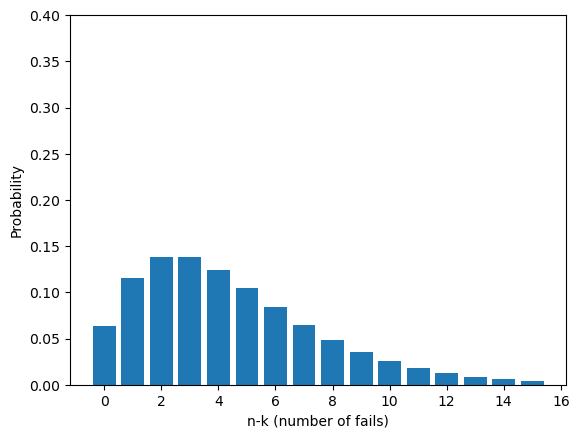

In [23]:
plt.bar(list(range(0, 16)), Dist2)
plt.ylim(0, 0.4)
plt.xlabel("n-k (number of fails)")
plt.ylabel("Probability")
plt.show()

### Geometric Distribution

Geometric: P of n independent trials leading to 1 success, with probability of p in each trial.
Negative Binomial: P of n independent trials leading to k successes, with probability of p in each trial.

Geo(n, p) = p(1-p)^(n-1)

### No Replacement

We draw red ball without replacement for example. What is the probability of drawing another red ball?

Trials with no replacement are dependent trials.
Remember *conditional probability* and Bayes Rule

### Hypergeometric Distribution

|||Enrichment Analysis|||
Formally: Whole genome (N) has m bZIP encoding genes, and my list of s genes drawn from the genome has k bZIP domains.

What is the Probability of having k bZIP domains in s genes, if list of all genes (N), has m bZIP genes?

If the P is very low, then your list has too many bZIP genes than it would be expected by chance. This can be interesting! 

Suppose we have a list 50 genes. 
20 of these genes encode proteins with bZIP domain (blue balls)

We choose 3 genes from the list of 50 genes.
What is the probability that 2 of them are bZIP genes?

In [24]:
def HyperGeom(n, k, a, b):
    return math.comb(n-k, a-b)*math.comb(k, b)/math.comb(n, a)

In [25]:
HyperGeom(50, 20, 3, 2)

0.29081632653061223

In [28]:
stats.hypergeom.pmf(2, 50, 20, 3) # b=k, n=M, k=n, a=N

0.2908163265306123

In [29]:
HyperGeom(20000, 3000, 700, 350)

5.332147691180228e-110

In [30]:
stats.hypergeom.pmf(105, 20000, 3000, 700)

0.042952460456653234

### Multivariate Hypergeometric Distribution

Imagine a genome with 5000 genes has 100 genes with bZIP domain and 250 genes with zinc-finger domain, other genes have no domain. 20 genes were randomly chosen (assume bZIP and zinc-finger do not co-exist on a protein)

What is the probability that there will be 5 genes with bZIP domains, 3 genes with zinc-finger domain, 12 genes with no domain in the set of 20?

In [31]:
def MultiHyperGeom(n, s, a, a1, b, b1):
    return math.comb(a, a1)*math.comb(b, b1)*math.comb(n-a-b, s-a1-b1)/math.comb(n, s)

In [33]:
MultiHyperGeom(5000, 20, 100, 5, 250, 3)

1.0797947144135472e-06